<center>

<div align="center">
    <img src="../Images/javeriana.PNG">
</div>

**Juan David Villate Lemus**

**José Rafael Peña Gutiérrez**

**Laura Katherine Moreno Giraldo**

**William Ricardo Fernández Garnica**

# Excercise 5
## Neural Networks in Keras

Use keras framework to solve the below exercises.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import nltk
from sklearn.model_selection import train_test_split
nltk.download('punkt')
nltk.download('stopwords')

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from matplotlib.colors import ListedColormap

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 5.1 Predict rating of a movie using Keras

**Exercise:** Use keras framework to predict rating.

In [2]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [3]:
dataTraining

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6
...,...,...,...,...,...
8417,2010,Our Family Wedding,""" our marriage , their wedding . "" it ' s l...","['Comedy', 'Romance']",4.9
1592,1984,Conan the Destroyer,"the wandering barbarian , conan , alongside ...","['Action', 'Adventure', 'Fantasy']",5.8
1723,1955,Kismet,"like a tale spun by scheherazade , kismet fol...","['Adventure', 'Musical', 'Fantasy', 'Comedy', ...",6.4
7605,1982,The Secret of NIMH,"mrs . brisby , a widowed mouse , lives in a...","['Animation', 'Adventure', 'Drama', 'Family', ...",7.6


In [4]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [5]:
plots

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [6]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

## Data Precosessing

- Remove stopwords
- Lowercase
- split the text in words
- pad_sequences

In [7]:
# Definir las stopwords y tokenizar las palabras
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return words

dataTraining['plot_processed'] = dataTraining['plot'].apply(preprocess_text)


X = dataTraining['plot_processed']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

max_len = max(len(seq) for seq in X_sequences)

X_padded = pad_sequences(X_sequences, maxlen=max_len)

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


## Build Model

Create a neural network to predict the rating of a movie, calculate the testing set accuracy.

In [8]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=max_len))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(256, dropout=0.3, kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Testing set accuracy:", test_accuracy)

Epoch 1/10
89/89 [==============================] - 22s 197ms/step - loss: 1.2148 - accuracy: 0.5172 - val_loss: 0.7015 - val_accuracy: 0.4684
Epoch 2/10
89/89 [==============================] - 12s 130ms/step - loss: 0.6941 - accuracy: 0.5220 - val_loss: 0.6918 - val_accuracy: 0.5316
Epoch 3/10
89/89 [==============================] - 11s 121ms/step - loss: 0.6926 - accuracy: 0.5227 - val_loss: 0.6912 - val_accuracy: 0.5316
Epoch 4/10
89/89 [==============================] - 10s 118ms/step - loss: 0.6933 - accuracy: 0.5223 - val_loss: 0.7005 - val_accuracy: 0.5348
Epoch 5/10
89/89 [==============================] - 10s 112ms/step - loss: 0.6662 - accuracy: 0.6446 - val_loss: 0.6723 - val_accuracy: 0.6313
Epoch 6/10
89/89 [==============================] - 10s 109ms/step - loss: 0.4465 - accuracy: 0.8258 - val_loss: 0.7149 - val_accuracy: 0.6361
Epoch 7/10
89/89 [==============================] - 9s 106ms/step - loss: 0.2303 - accuracy: 0.9277 - val_loss: 0.9831 - val_accuracy: 0.6329


In [9]:
model

# 5.2 Decision Boundary --  Moons Dataset

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

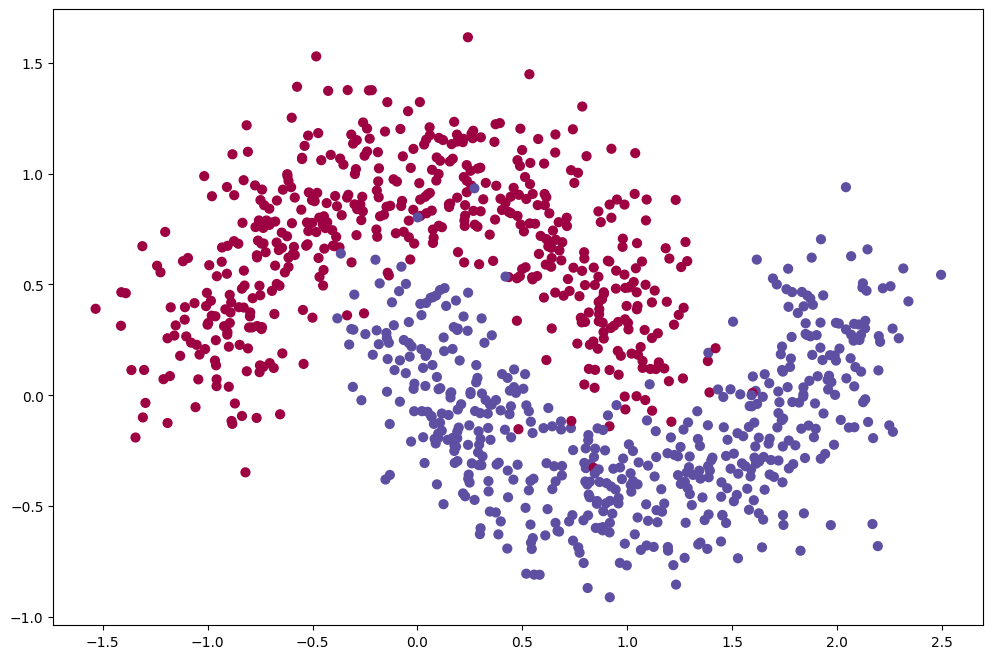

In [10]:
# Create moons dataset.

from sklearn.datasets import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

In [11]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Crear el modelo
model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(2,)))  # Capa oculta con 10 neuronas
model.add(Dense(units=10, activation='relu'))  # Añadir otra capa oculta
model.add(Dense(units=1, activation='sigmoid'))  # Capa de salida

# Compilar el modelo
model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, epochs=200, batch_size=64, verbose=1)


Epoch 1/200
16/16 [==============================] - 1s 4ms/step - loss: 0.7638 - accuracy: 0.4550
Epoch 2/200
16/16 [==============================] - 0s 3ms/step - loss: 0.7210 - accuracy: 0.5120
Epoch 3/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5850
Epoch 4/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.7320
Epoch 5/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6171 - accuracy: 0.8450
Epoch 6/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5806 - accuracy: 0.8790
Epoch 7/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5479 - accuracy: 0.8760
Epoch 8/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5181 - accuracy: 0.8680
Epoch 9/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4895 - accuracy: 0.8580
Epoch 10/200
16/16 [==============================] - 0s 3ms/step - loss: 0.4633 - accuracy: 0.8560
Epoch 11/

In [12]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Accuracy en el conjunto de entrenamiento: {train_accuracy:.2f}")

Accuracy en el conjunto de entrenamiento: 0.98


**Hint:** Use the next function to plt the decision boundary,

2143/2143 [==============================] - 3s 2ms/step


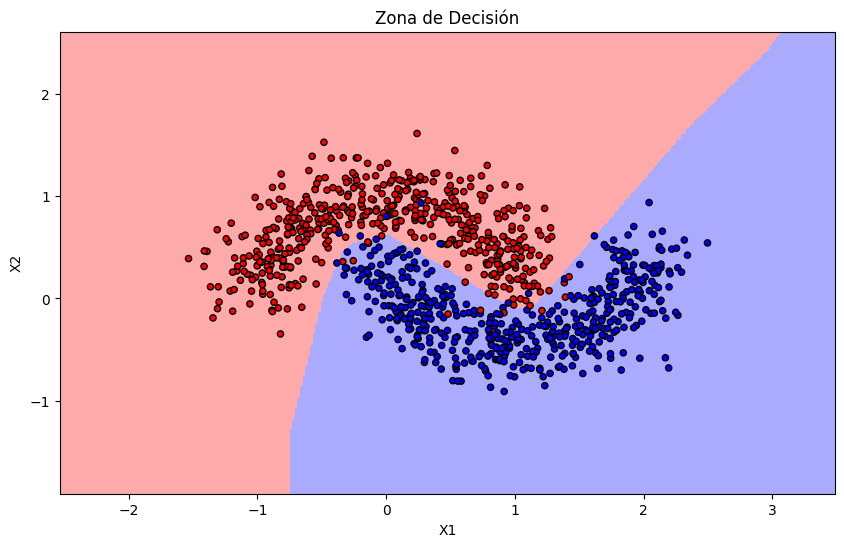

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model):
    # Configurar los colores del mapa de colores
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    # Definir los límites del gráfico y crear una malla de puntos
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predecir las categorías para cada punto en la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z > 0.5
    Z = Z.reshape(xx.shape)

    # Dibujar el contorno y los ejemplos de entrenamiento
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Zona de Decisión")
    plt.xlabel('X1')
    plt.ylabel('X2')

# Ahora usamos la función definida para dibujar la región de decisión
plot_decision_boundary(x_train, y_train, model)
plt.show()


8551/8551 [==============================] - 13s 2ms/step


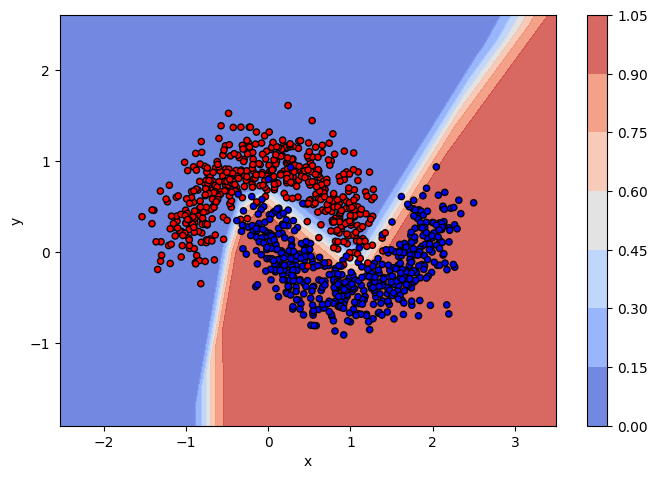

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Función para realizar la predicción en una malla de puntos
def pred_fun(model, X):
    return model.predict(X).ravel()

# Función para graficar la región de decisión
def plot_decision_region(model, X, pred_fun):
    # Definir los límites de la gráfica y crear una malla de puntos
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Preparar la malla para hacer predicciones
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = pred_fun(model, mesh_points)
    Z = Z.reshape(xx.shape)

    # Dibujar el contorno y los ejemplos de entrenamiento
    plt.figure(figsize=(8, 16/3))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")

# Función para graficar los datos de entrenamiento
def plot_data(X, y):
    # Crear mapa de colores
    cmap_bold = mcolors.ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

# Utilizar las funciones para graficar la región de decisión y los datos de entrenamiento
plot_decision_region(model, x_train, pred_fun)
plot_data(x_train, y_train)
plt.show()


# 5.2 Decision Boundary --  Moons Dataset Opcion 2

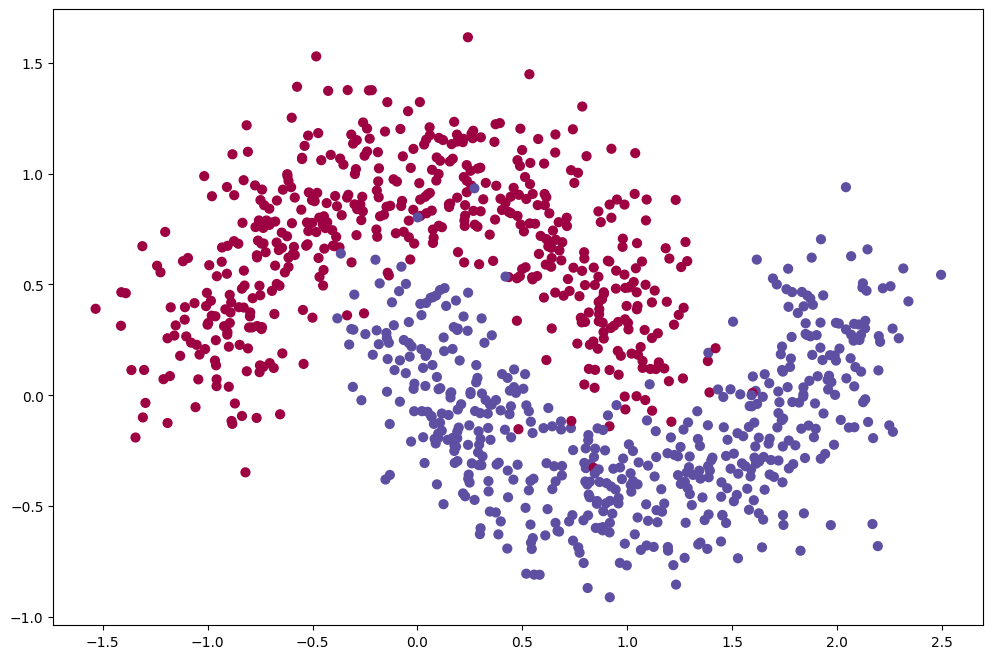

In [15]:
# Create moons dataset.

from sklearn.datasets import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

1/1 [==============================] - 0s 16ms/step


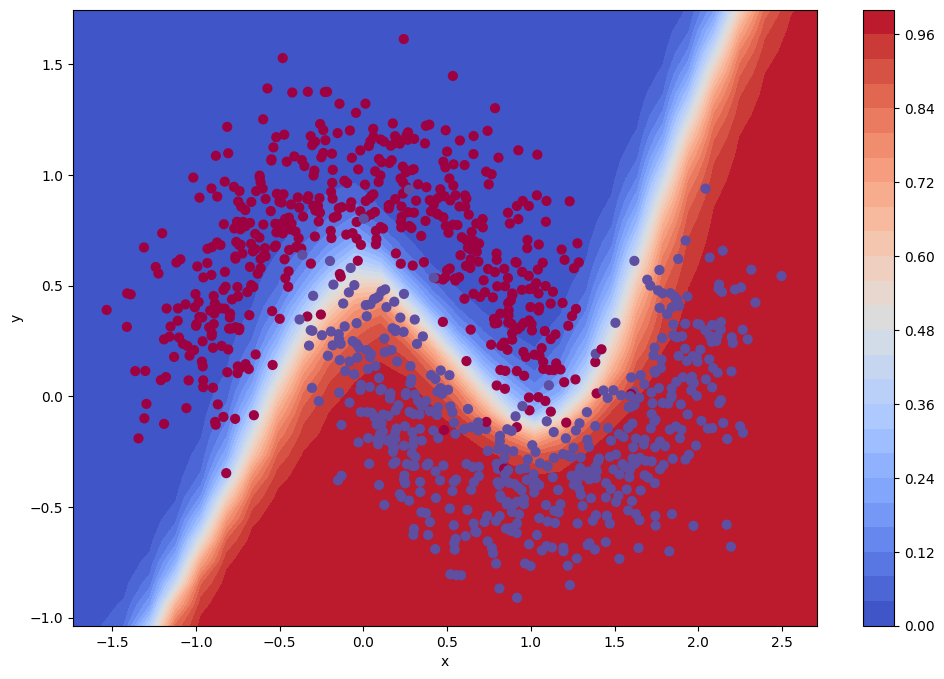

In [16]:
x_train, y_train = make_moons(n_samples=1000, noise=0.2, random_state=3)

model = Sequential([
    Dense(16, input_dim=2, activation='tanh'),
    Dense(8, activation='relu'),
    Dense(8, activation='sigmoid'),
    Dense(8, activation='elu'),
    Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap=plt.cm.coolwarm, vmin=0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")

def pred_fun(model, x1, x2):
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

# Plot decision region
plt.figure(figsize=(12, 8))
plot_decision_region(model, x_train, pred_fun)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.show()

In [17]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Accuracy en el conjunto de entrenamiento: {train_accuracy:.2f}")

Accuracy en el conjunto de entrenamiento: 0.98
